In [2]:
import pandas as pd
import iris
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,10)


In [3]:
DIR='/prj/GREENHOUSE/GREENHOUSE_sites/data/Brattleby/'
ECPfile=DIR+'ConCrop_JULES_drive_data.nc'
ALBfile=DIR+'Brattleby_hourly_met_2006-13.dat'


In [4]:
DataDict={}
inf=nc.Dataset(ECPfile,'r')
for var in inf.variables:
    if str(var) not in ['x','time']:
        DataDict[str(var)]=inf.variables[str(var)][:].squeeze()

Time=nc.num2date(inf.variables['time'][:],units=inf.variables['time'].units)
precip_series=pd.Series(DataDict['precip']*86400,Time)

ECP_DataFrame=pd.DataFrame(DataDict,index=Time)

In [5]:
ALB_data=np.loadtxt(ALBfile)

In [6]:
ALB_vars=['sw_down','lw_down','wind','precip','t','pstar','q']
ALB_DataDict={ varname:ALB_data[:,ivar] for varname,ivar in zip(ALB_vars,range(len(ALB_vars)))}
ALB_time_num = (np.arange(len(ALB_data[:,0]))*3600.)
ALB_time_obj = nc.num2date(ALB_time_num,units='seconds since 2006-01-01 01:00:00') 

ALB_DataFrame=pd.DataFrame(ALB_DataDict,index=ALB_time_obj)

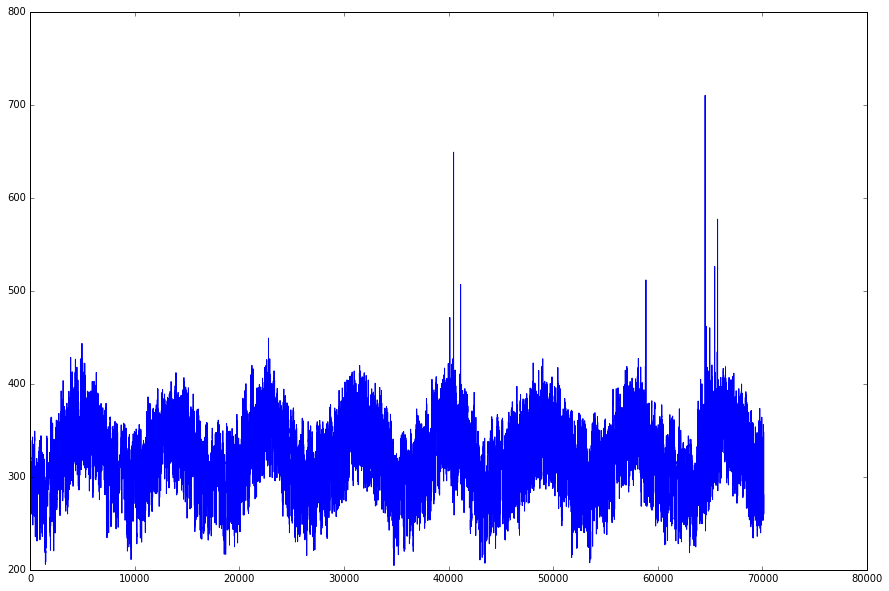

In [7]:
plt.plot(ALB_DataDict['lw_down'][:])

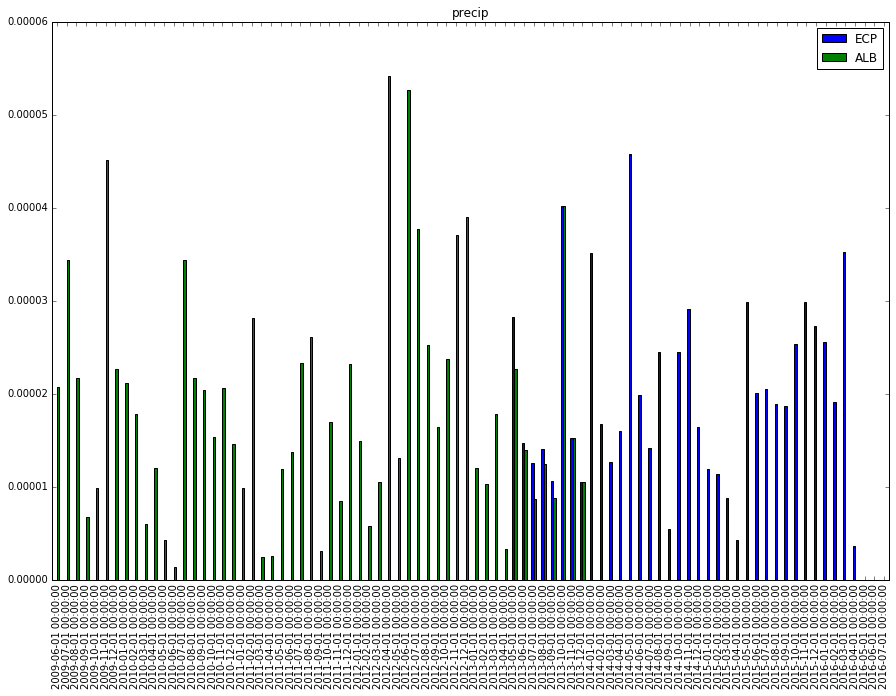

In [17]:
var='precip'
DF=pd.concat([ECP_DataFrame[var],ALB_DataFrame[var][30000:]],axis=1)
DF.columns=['ECP','ALB']
DF=DF.resample('MS').mean()#.rolling(15).mean()
DF.plot(title=var,kind='bar')
#plt.xticks(np.arange(1,80,6))
plt.show()

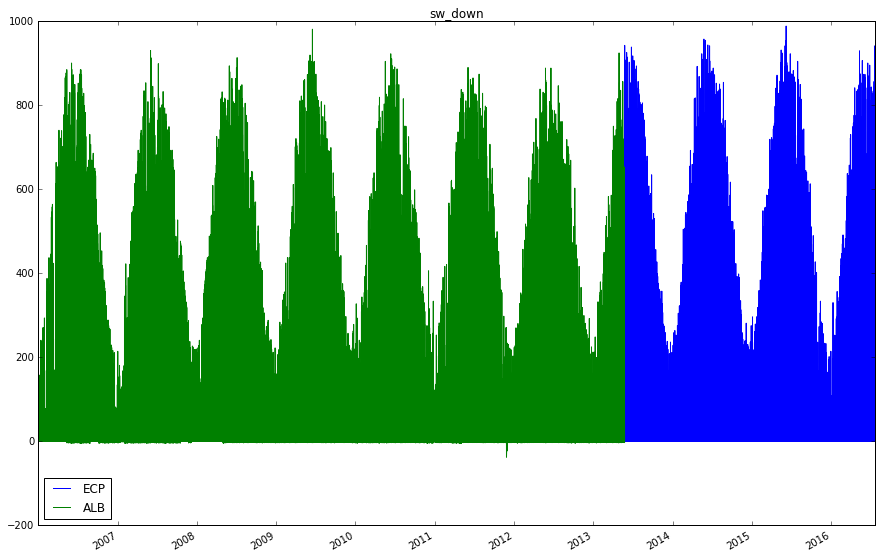

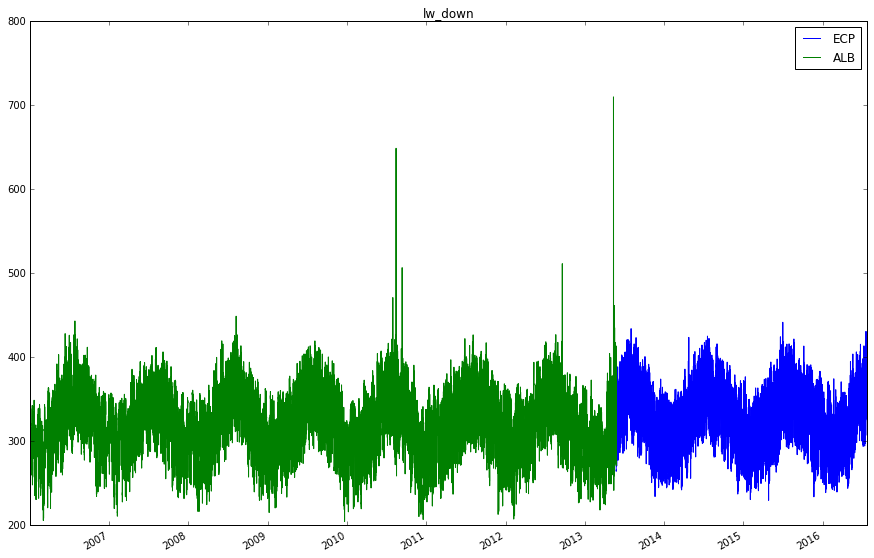

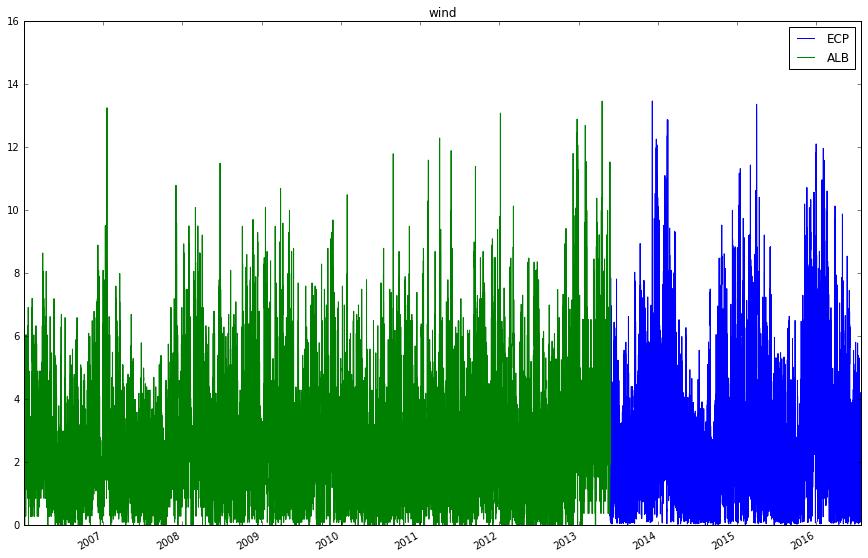

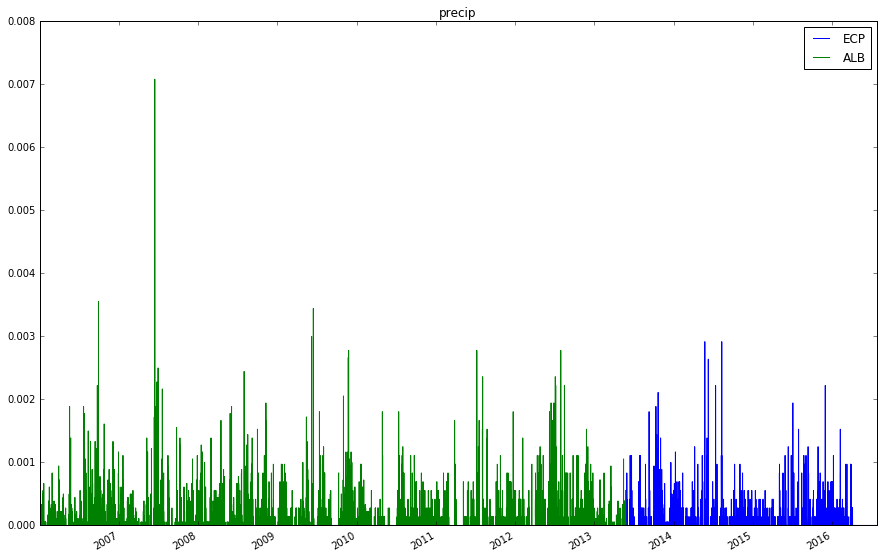

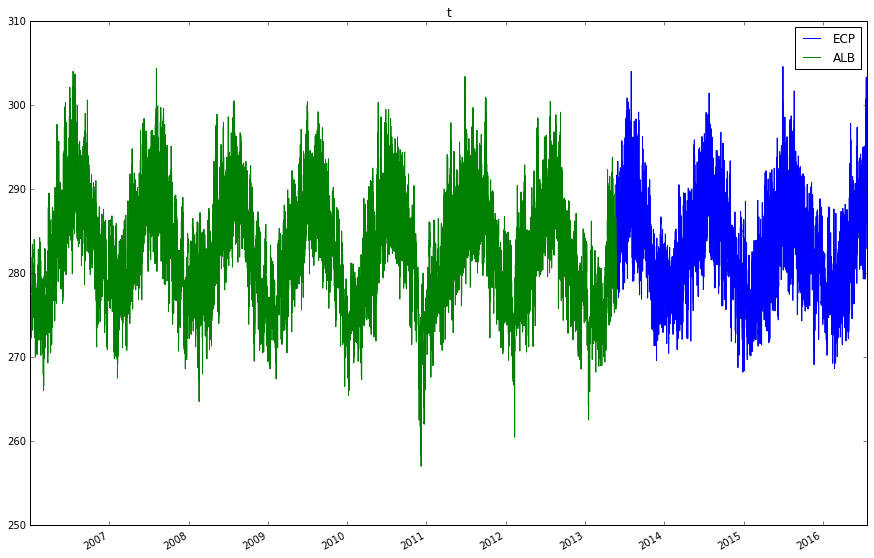

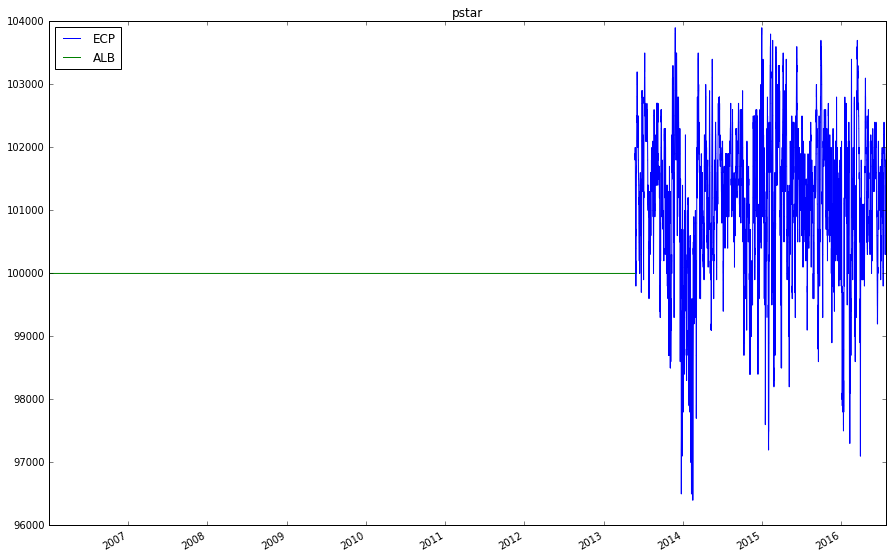

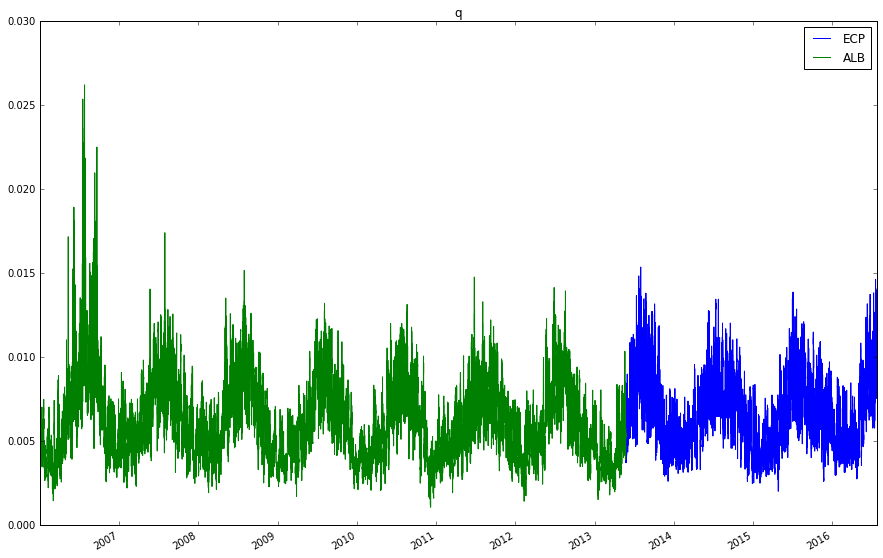

In [52]:
for var in ALB_vars:
    DF=pd.concat([ECP_DataFrame[var],ALB_DataFrame[var]],axis=1)
    DF.columns=['ECP','ALB']
    DF.plot(title=var)
    plt.show()

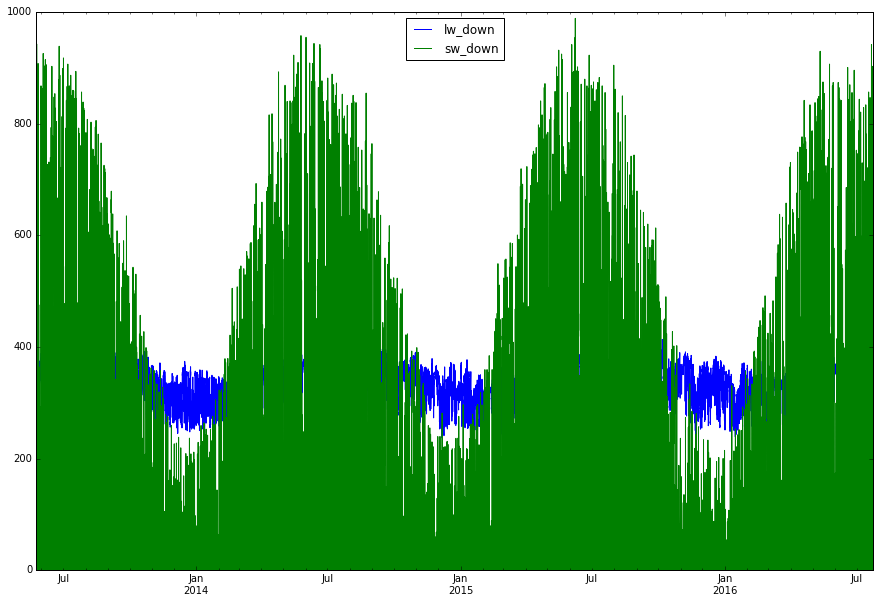

In [8]:
vars=['lw_down','sw_down']

DataFrame[vars].plot()
